# Computer Vision 1: Assignment 1

Task 2

Group Number 43

Marek Drwal

## setup

In [1]:
import imageio
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

## read

In [2]:
img_pth = 'visual_attention_ds.png'

In [3]:
img = ski.io.imread(img_pth)

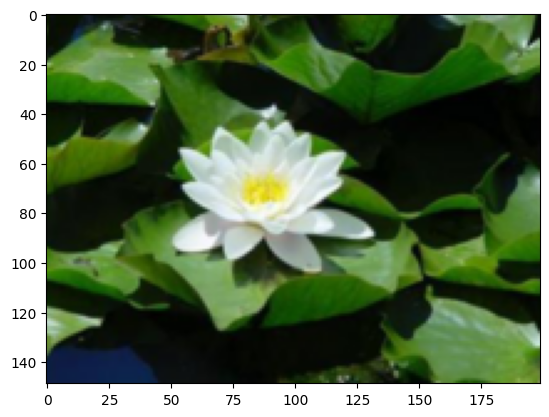

In [4]:
plt.imshow(img)

## convert

In [5]:
img = ski.color.rgba2rgb(img)

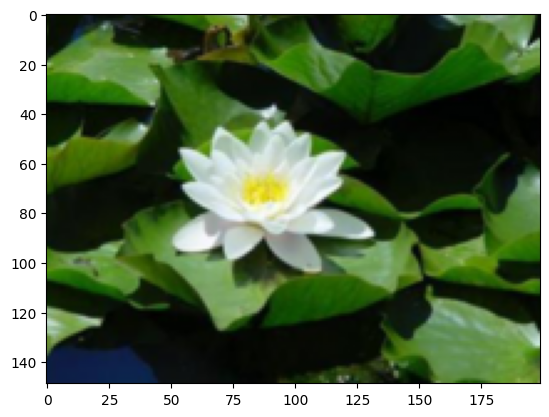

In [6]:
plt.imshow(img)

In [7]:
img = ski.color.rgb2gray(img)

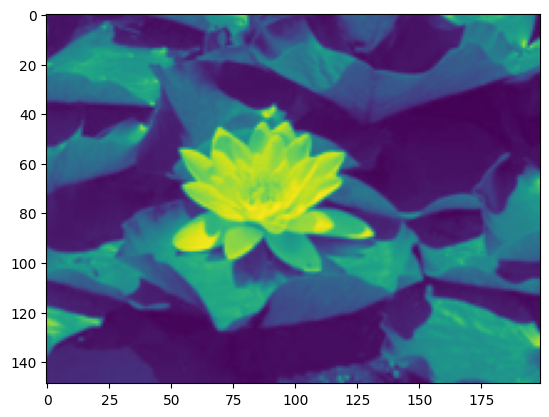

In [8]:
plt.imshow(img)

## integral img

In [9]:
ii = ski.transform.integral_image(img)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [10]:
ii.shape

(149, 199)

In [11]:
img.shape

(149, 199)

In [12]:
c_dims = (11,11)
s_dims = (21,21)

In [13]:
c_size = 11
s_size = 21

In [14]:
s = np.zeros_like(img)
c = np.zeros_like(img)

In [15]:
s = c = 0

In [16]:
sc_img = np.zeros_like(img)

In [17]:
y_dim, x_dim = img.shape

In [18]:
for y in range(y_dim):
    for x in range(x_dim):
        # st = max((0,0), (x-s_size, y-s_size))
        st = (max(y-s_size, 0), max(x-s_size, 0))
        # en = min((y_dim, x_dim), (x+s_size, y+s_size))
        en = (min(y+s_size, y_dim-1), min(x+s_size, x_dim-1))
        # print(st, en)
        s = ski.transform.integrate(ii, st, en)[0]
        
        st = (max(y-c_size, 0), max(x-c_size, 0))
        en = (min(y+c_size, y_dim-1), min(x+c_size, x_dim-1))
        c = ski.transform.integrate(ii, st, en)[0]

        sc_img[y][x] = s-c
        

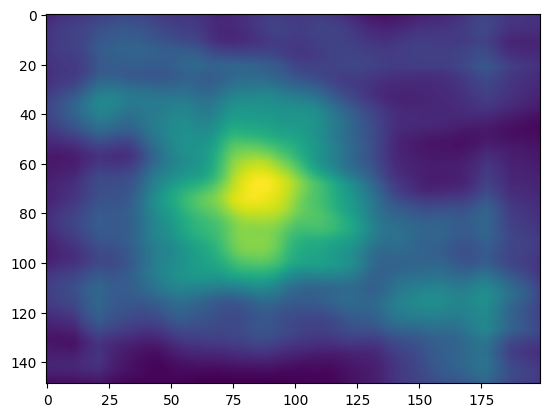

In [19]:
plt.imshow(sc_img)